In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto

plt.style.use('seaborn')
sns.set_style("whitegrid")
sns.set_context("talk")

## Instantiate a random graph and transform into an adjacency matrix

In [17]:
graph_nx = nx.erdos_renyi_graph(n=100, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

## Instantiate model with parameters

In [18]:
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))                 

## Run simulation - output is time series for all nodes (node vs time)

In [19]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(100, 1000)


## Plot all the time series

Text(0, 0.5, '$\\sin(\\theta)$')

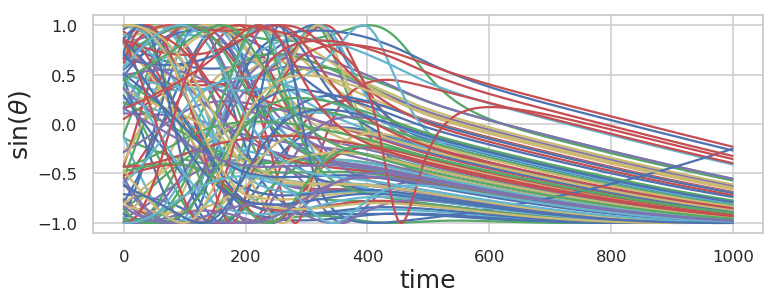

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(np.sin(act_mat.T))
plt.xlabel('time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

## Plot evolution of order global order parameter $R_t$

(-0.01, 1)

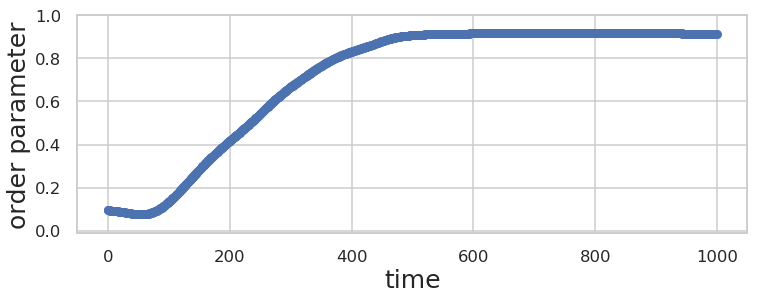

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(
    [model.phase_coherence(vec)
     for vec in act_mat.T],
    'o'
)
plt.ylabel('order parameter', fontsize=25)
plt.xlabel('time', fontsize=25)
plt.ylim((-0.01, 1))

## Plot oscillators in complex plane at times $t = 0, 250, 500$

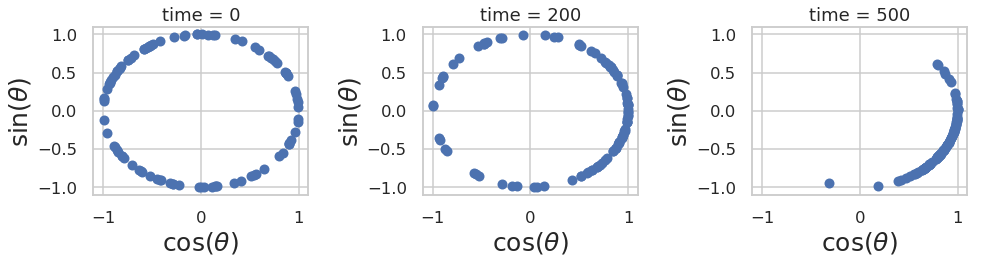

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(14, 4))

times = [0, 200, 500]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', markersize=10)
    ax.set_title(f'time = {time}')
    ax.set_ylim((-1.1, 1.1))
    ax.set_xlim((-1.1, 1.1))
    ax.set_xlabel(r'$\cos(\theta)$', fontsize=25)
    ax.set_ylabel(r'$\sin(\theta)$', fontsize=25)
    ax.grid(True)
plt.tight_layout()